In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
cities = pd.read_csv('../Dataset/dim_cities.csv')
respondents = pd.read_csv('../Dataset/dim_repondents.csv')
survey = pd.read_csv('../Dataset/fact_survey_responses.csv')

cities = pd.DataFrame(cities)
respondents = pd.DataFrame(respondents)
survey = pd.DataFrame(survey)

In [3]:
# cities['City_ID'] = 'CT111'
cities.describe()


,City_ID,City,Tier
count,10,10,10
unique,10,10,2
top,CT111,Delhi,Tier 1
freq,1,1,5


### Tier-wise cities list

In [4]:
grouped_City = cities.groupby('Tier')['City'].value_counts()
grouped_City

Tier    City     
Tier 1  Bangalore    1
        Chennai      1
        Delhi        1
        Hyderabad    1
        Mumbai       1
Tier 2  Ahmedabad    1
        Jaipur       1
        Kolkata      1
        Lucknow      1
        Pune         1
Name: City, dtype: int64

In [5]:
respondents['Respondent_ID'].nunique()

10000

In [6]:

respondents.isnull().sum()
# no any null vlaue is there



Respondent_ID    0
Name             0
Age              0
Gender           0
City_ID          0
dtype: int64

In [7]:
age_gender_counts = respondents.groupby(['Age', 'Gender']).size().unstack()
# age_gender_counts

age_groups = age_gender_counts.index

#### Age-group wise male vs Female comparision

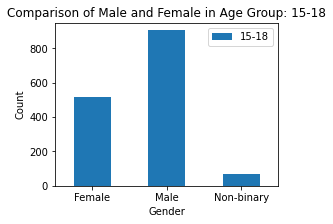

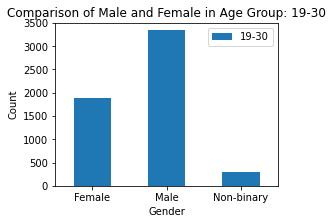

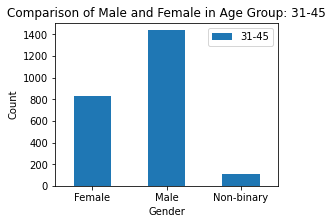

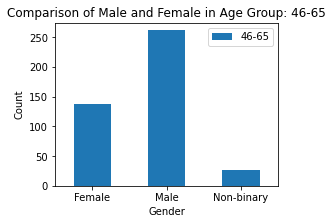

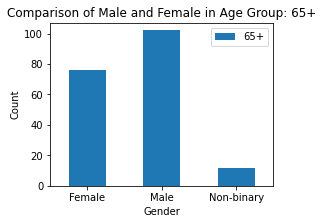

In [8]:
age_groups = age_gender_counts.index
# age_groups = age_gender_counts['Age']

for age_group in age_groups:
    plt.figure(figsize=(4, 3))
    gender_counts = age_gender_counts.loc[age_group]
    gender_counts.plot(kind='bar', rot=0)
    plt.title(f'Comparison of Male and Female in Age Group: {age_group}')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Note: Same graph as below will be in form of grid here below


<Figure size 2160x1008 with 0 Axes>

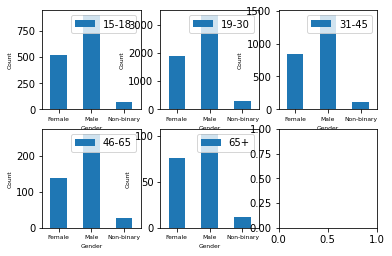

In [9]:
# Set the desired figure size
plt.figure(figsize=(30, 14))

# Plot the bar charts for each age group
age_groups = age_gender_counts.index
num_charts = len(age_groups)
num_cols = 3  # Number of columns in the grid
num_rows = (num_charts - 1) // num_cols + 1  # Number of rows in the grid ----- IMP to understand

# Create subplots with the specified grid layout
fig, axes = plt.subplots(num_rows, num_cols)

# Flatten the axes array
axes = axes.flatten()


# Iterate over the age groups and plot the bar charts
for i, age_group in enumerate(age_groups):
    ax = axes[i]  # Select the current subplot
    gender_counts = age_gender_counts.loc[age_group]
    gender_counts.plot(kind='bar', rot=0, ax=ax)
    # ax.set_title(f'Comparison of Male and Female in Age Group: {age_group}')
    ax.set_xlabel('Gender',fontsize=6)
    ax.set_ylabel('Count', fontsize=6)
    ax.legend()
    ax.tick_params(axis='x', labelsize=6)


In [10]:
new_respondent = pd.merge(cities, respondents, on='City_ID')
new_respondent



,City_ID,City,Tier,Respondent_ID,Name,Age,Gender
0,CT111,Delhi,Tier 1,120094,Armaan Bassi,31-45,Non-binary
1,CT111,Delhi,Tier 1,120120,Kiaan Uppal,19-30,Female
2,CT111,Delhi,Tier 1,120162,Hazel Chanda,65+,Non-binary
3,CT111,Delhi,Tier 1,120202,Stuvan Som,19-30,Female
4,CT111,Delhi,Tier 1,120217,Adira Raman,31-45,Female
...,...,...,...,...,...,...,...
9995,CT120,Lucknow,Tier 2,129719,Aaryahi Wason,19-30,Female
9996,CT120,Lucknow,Tier 2,129777,Ryan Kothari,15-18,Male
9997,CT120,Lucknow,Tier 2,129814,Sara Kothari,19-30,Male
9998,CT120,Lucknow,Tier 2,129829,Shamik Deep,19-30,Female


In [11]:
# new_respondent.to_csv('new_respondent.csv')

In [12]:
# gender_counts = df.groupby(['City_ID', 'Gender']).size().unstack()

#### City wise Male and Female respondents

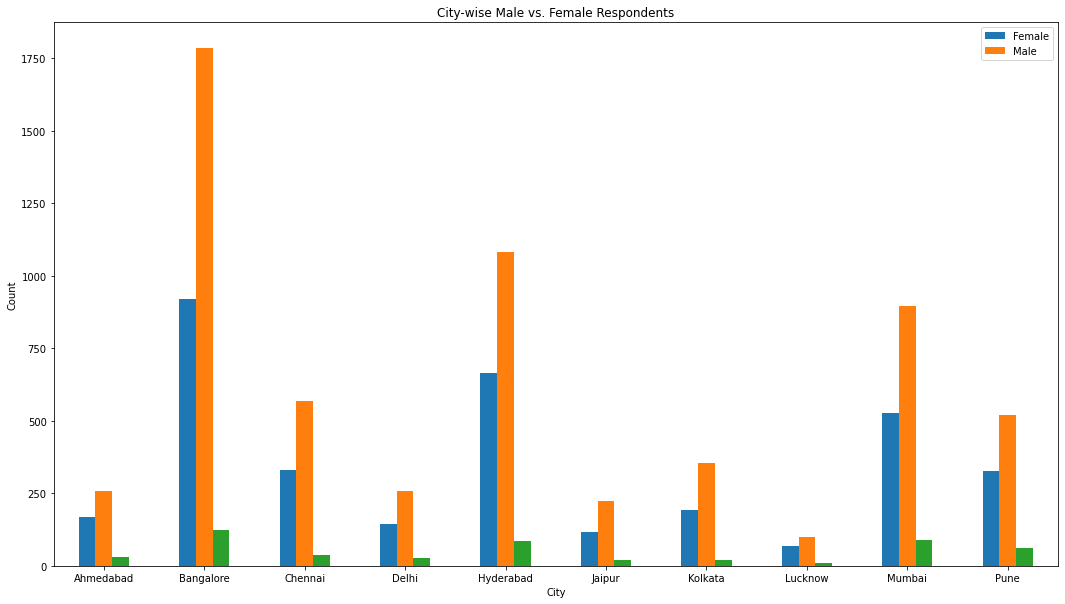

In [13]:
import matplotlib.pyplot as plt

gender_counts = new_respondent.groupby(['City', 'Gender']).size().unstack()

fig, ax = plt.subplots(figsize=(18, 10))
gender_counts.plot(kind='bar', rot=0, ax=ax)  # width = 0.6

plt.title('City-wise Male vs. Female Respondents')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])


plt.show()


In [14]:
gender_counts

Gender,Female,Male,Non-binary
City,,,
Ahmedabad,168,257,31
Bangalore,921,1784,123
Chennai,330,569,38
Delhi,144,258,27
Hyderabad,666,1082,85
Jaipur,116,223,21
Kolkata,192,354,20
Lucknow,67,98,10
Mumbai,526,894,90


In [15]:
survey.columns
# new_respondent

Index(['Response_ID', 'Respondent_ID', 'Consume_frequency', 'Consume_time',
       'Consume_reason', 'Heard_before', 'Brand_perception',
       'General_perception', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [16]:
survey

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,...,Other,Caffeine,No,No,Print media,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late
9996,112997,130027,Daily,To stay awake during work/study,To combat fatigue,No,Positive,Healthy,Yes,2,...,More natural ingredients,Caffeine,No,No,TV commercials,Other,Yes,50-99,Online retailers,Social outings/parties
9997,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,...,Other,Caffeine,Yes,No,Outdoor billboards,Compact and portable cans,No,100-150,Other,Sports/exercise
9998,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,...,Other,Sugar,Yes,Yes,Online ads,Compact and portable cans,Not Sure,50-99,Supermarkets,Studying/working late


### Which type of marketing reaches the most Youth (15-30)?

In [17]:
# main_data = pd.merge(new_respondent, survey, on='Respondent_ID')

marketing_reach = survey[['Marketing_channels', 'Respondent_ID']]


In [18]:
marketing_reach = pd.merge(marketing_reach, respondents, on='Respondent_ID')
marketing_reach.reset_index(drop=True, inplace=True)


In [19]:
marketing_reach = marketing_reach.dropna(axis=0, how='all')
marketing_reach

,Marketing_channels,Respondent_ID,Name,Age,Gender,City_ID
0,TV commercials,120031,Aniruddh Issac,15-18,Female,CT117
1,Print media,120032,Trisha Rout,19-30,Male,CT118
2,Online ads,120033,Yuvraj Virk,15-18,Male,CT116
3,Online ads,120034,Pranay Chand,31-45,Female,CT113
4,Online ads,120035,Mohanlal Joshi,19-30,Female,CT120
...,...,...,...,...,...,...
9995,Print media,130026,Arnav Kale,31-45,Male,CT112
9996,TV commercials,130027,Yuvraj Agrawal,15-18,Male,CT113
9997,Outdoor billboards,130028,Vardaniya Chauhan,31-45,Male,CT114
9998,Online ads,130029,Jayan Goyal,19-30,Male,CT113


In [20]:
# marketing_reach_15_30 = []
# age_ranges = ['15-18', '19-30']
marketing_reach_15_30 = marketing_reach[marketing_reach['Age'].isin(['15-18', '19-30'])]
marketing_reach_15_30




,Marketing_channels,Respondent_ID,Name,Age,Gender,City_ID
0,TV commercials,120031,Aniruddh Issac,15-18,Female,CT117
1,Print media,120032,Trisha Rout,19-30,Male,CT118
2,Online ads,120033,Yuvraj Virk,15-18,Male,CT116
4,Online ads,120035,Mohanlal Joshi,19-30,Female,CT120
5,TV commercials,120036,Zeeshan Ratta,19-30,Female,CT118
...,...,...,...,...,...,...
9993,Online ads,130024,Madhav Sheth,19-30,Non-binary,CT113
9994,Print media,130025,Drishya Kale,19-30,Male,CT112
9996,TV commercials,130027,Yuvraj Agrawal,15-18,Male,CT113
9998,Online ads,130029,Jayan Goyal,19-30,Male,CT113


In [21]:
# marketing_reach_15_30.to_csv('marketing_reach_15_30.csv')


Out of 10,000 people 7008 people fall in the Youth Category(15-30)


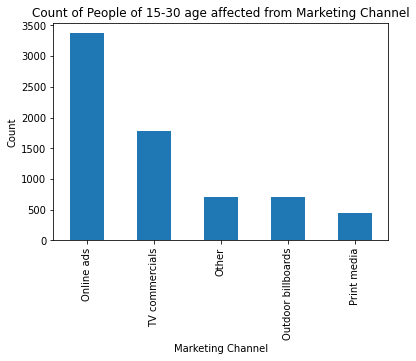

In [22]:
print("Out of 10,000 people 7008 people fall in the Youth Category(15-30)")
# Count the occurrences of each marketing channel
channel_counts = marketing_reach_15_30['Marketing_channels'].value_counts()

# Set up subplot configuration
fig, ax = plt.subplots()

# Plot the bar chart
channel_counts.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Marketing Channel')
ax.set_ylabel('Count')
ax.set_title('Count of People of 15-30 age affected from Marketing Channel')

# Display the chart
plt.show()



## Consumer Preferences 

In [23]:
survey.columns

Index(['Response_ID', 'Respondent_ID', 'Consume_frequency', 'Consume_time',
       'Consume_reason', 'Heard_before', 'Brand_perception',
       'General_perception', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [24]:
preference = survey[['Respondent_ID','Ingredients_expected', 'Packaging_preference']]
preference

,Respondent_ID,Ingredients_expected,Packaging_preference
0,120031,Guarana,Compact and portable cans
1,120032,Caffeine,Compact and portable cans
2,120033,Caffeine,Innovative bottle design
3,120034,Caffeine,Compact and portable cans
4,120035,Caffeine,Compact and portable cans
...,...,...,...
9995,130026,Caffeine,Compact and portable cans
9996,130027,Caffeine,Other
9997,130028,Caffeine,Compact and portable cans
9998,130029,Sugar,Compact and portable cans


In [25]:
# Group by 'Ingredients_expected' and get the count
ingredients_preference = preference.groupby('Ingredients_expected').size().reset_index(name='Count')

# Print the count of people along with unique ingredients
# print(preference)
ingredients_preference = ingredients_preference.sort_values('Count')

ingredients_preference

# have a glance at tabulate and colorama liibraries for appealing and colorful table


,Ingredients_expected,Count
1,Guarana,1553
2,Sugar,2017
3,Vitamins,2534
0,Caffeine,3896


In [26]:
ingredients_preference['percent_people'] = (ingredients_preference['Count']/10000)*100
ingredients_preference

,Ingredients_expected,Count,percent_people
1,Guarana,1553,15.53
2,Sugar,2017,20.17
3,Vitamins,2534,25.34
0,Caffeine,3896,38.96


In [27]:
# ingredients_preference.to_csv('ingredients_preference.csv')

In [28]:
# packaging preference

preference['Packaging_preference'].unique()

array(['Compact and portable cans', 'Innovative bottle design', 'Other',
       'Eco-friendly design', 'Collectible packaging'], dtype=object)

In [29]:
preference = preference.groupby('Packaging_preference').size().reset_index(name = 'count')
preference['percent_people'] = (preference['count']/10000)*100
preference

,Packaging_preference,count,percent_people
0,Collectible packaging,1501,15.01
1,Compact and portable cans,3984,39.84
2,Eco-friendly design,983,9.83
3,Innovative bottle design,3047,30.47
4,Other,485,4.85


In [30]:
preference.sort_values('count')

,Packaging_preference,count,percent_people
4,Other,485,4.85
2,Eco-friendly design,983,9.83
0,Collectible packaging,1501,15.01
3,Innovative bottle design,3047,30.47
1,Compact and portable cans,3984,39.84


In [31]:
# preference.to_csv('preference.csv')


# preferemces data contains the the preferences.

In [32]:
# Data Cleaning

survey.drop(survey[(survey['Heard_before'] == 'No') & (survey['Tried_before'] == 'Yes')].index, inplace=True)


In [33]:
survey

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late
5,103006,120036,Rarely,For mental alertness,To combat fatigue,Yes,Negative,Not sure,No,5,...,Wider range of flavors,Vitamins,Yes,Yes,TV commercials,Other,Yes,Above 150,Gyms and fitness centers,Social outings/parties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,112995,130025,2-3 times a week,Throughout the day,Increased energy and focus,Yes,Neutral,Not sure,No,4,...,Wider range of flavors,Caffeine,Yes,Yes,Print media,Compact and portable cans,No,Above 150,Supermarkets,Other
9995,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,...,Other,Caffeine,No,No,Print media,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late
9997,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,...,Other,Caffeine,Yes,No,Outdoor billboards,Compact and portable cans,No,100-150,Other,Sports/exercise
9998,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,...,Other,Sugar,Yes,Yes,Online ads,Compact and portable cans,Not Sure,50-99,Supermarkets,Studying/working late


In [34]:
# Reason_for_brand = survey[survey['']]

## competition Analysis

#### a. Who are the current market leaders?
#### b. What are the primary reasons consumers prefer those brands over ours?

In [35]:
survey.columns
# Respondent_ID, Current_brands, Consume_frequency, Reasons_for_choosing_brands
competition_data = survey[['Respondent_ID', 'Current_brands', 'Consume_frequency', 'Reasons_for_choosing_brands']]
competition_data

,Respondent_ID,Current_brands,Consume_frequency,Reasons_for_choosing_brands
0,120031,Blue Bull,2-3 times a week,Availability
1,120032,Bepsi,2-3 times a month,Availability
2,120033,Bepsi,Rarely,Availability
4,120035,Sky 9,Daily,Other
5,120036,Cola-Coka,Rarely,Availability
...,...,...,...,...
9994,130025,Sky 9,2-3 times a week,Taste/flavor preference
9995,130026,Cola-Coka,Daily,Brand reputation
9997,130028,Blue Bull,Daily,Availability
9998,130029,Blue Bull,2-3 times a week,Taste/flavor preference


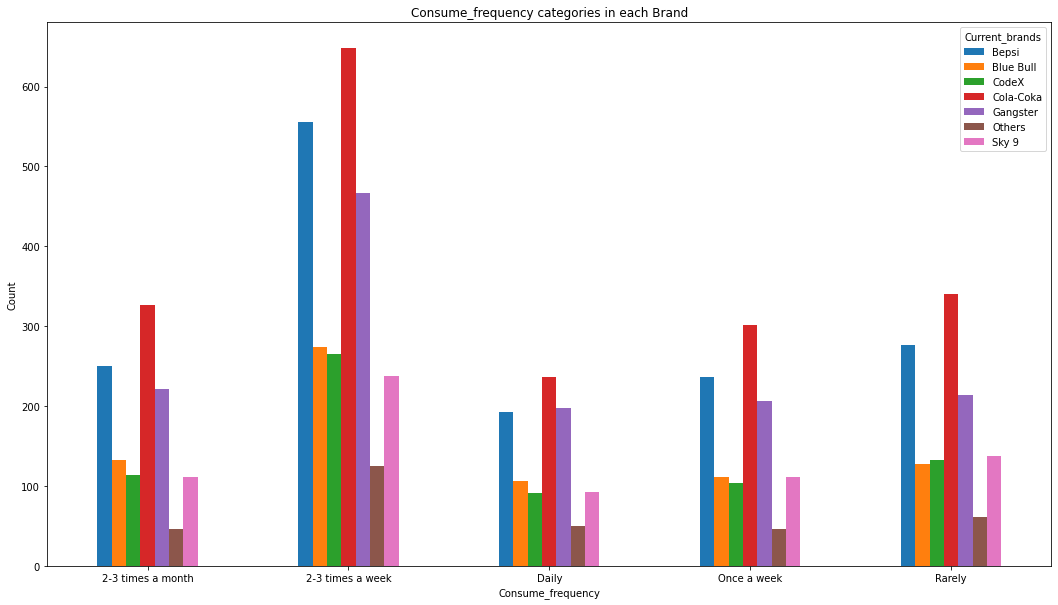

In [36]:

# Group the data by consumer_frequency and count the number of unique brands
brand_counts = competition_data.groupby(['Consume_frequency','Current_brands']).size().unstack()

fig, ax = plt.subplots(figsize=(18, 10))

brand_counts.plot(kind='bar', rot=0, ax=ax)  # width = 0.6

plt.title('Consume_frequency categories in each Brand')
plt.xlabel('Consume_frequency')
plt.ylabel('Count')
# plt.legend(['Female', 'Male'])



plt.show()



# Note: Check the ratio of people having which consume_frequency more and what can be done for that

In [37]:
competition_data.to_csv('Competition_Analysis.csv', index=False)

In [38]:
competition_data['Reasons_for_choosing_brands'].unique()

array(['Availability', 'Other', 'Brand reputation', 'Effectiveness',
       'Taste/flavor preference'], dtype=object)

Text(0, 0.5, 'Count')

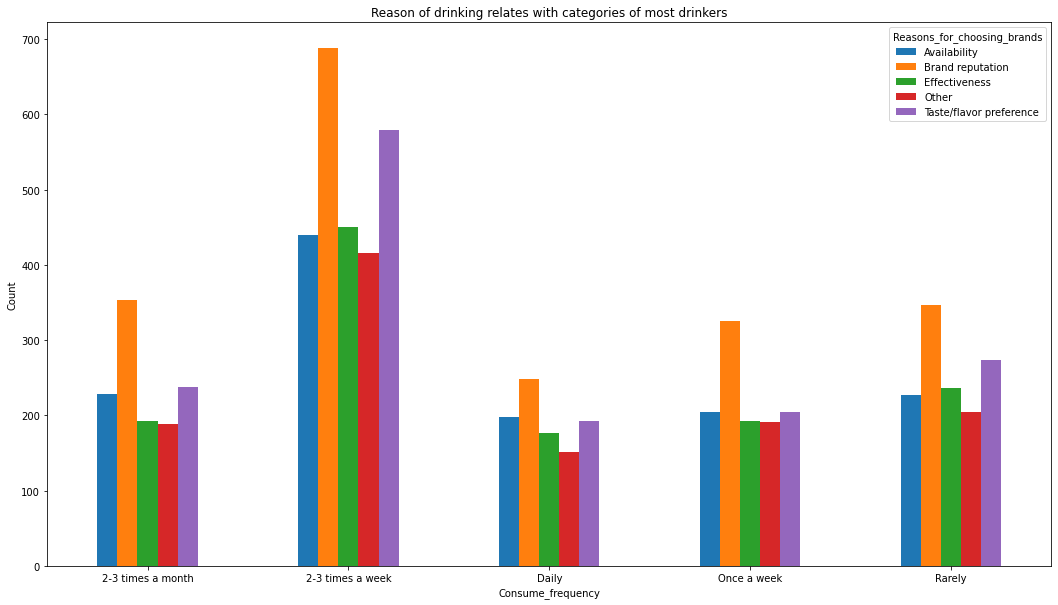

In [39]:
reasons_count = competition_data.groupby(['Consume_frequency','Reasons_for_choosing_brands']).size().unstack()

fig, ax = plt.subplots(figsize=(18,10))
reasons_count.plot(kind = 'bar', rot=0, ax=ax)
plt.title('Reason of drinking relates with categories of most drinkers')
plt.xlabel('Consume_frequency')
plt.ylabel('Count')

# Codex should not focus on supply chain or logistics. Just focus on marketing and making the Brand.

In [40]:
reasons_count.to_csv('reasons_and_brands.csv')

In [41]:
# Note: Company evaluation is not given so we can not decide the cetrtrtain paremeters as recommendation: \
# all recommendations in just one slide

In [42]:
competition_data.to_csv('competition_data.csv')

## Marketing Channels and Brand Awareness:
#### a. Which marketing channel can be used to reach more customers?
#### b. How effective are different marketing strategies and channels in reaching our customers?

In [43]:
survey.columns
# Marketing_channels, Respondent_ID, 
# survey['Marketing_channels'].unique()

Index(['Response_ID', 'Respondent_ID', 'Consume_frequency', 'Consume_time',
       'Consume_reason', 'Heard_before', 'Brand_perception',
       'General_perception', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [44]:
marketing_channel = survey[['Respondent_ID','Marketing_channels','Current_brands']]
marketing_channel

,Respondent_ID,Marketing_channels,Current_brands
0,120031,TV commercials,Blue Bull
1,120032,Print media,Bepsi
2,120033,Online ads,Bepsi
4,120035,Online ads,Sky 9
5,120036,TV commercials,Cola-Coka
...,...,...,...
9994,130025,Print media,Sky 9
9995,130026,Print media,Cola-Coka
9997,130028,Outdoor billboards,Blue Bull
9998,130029,Online ads,Blue Bull


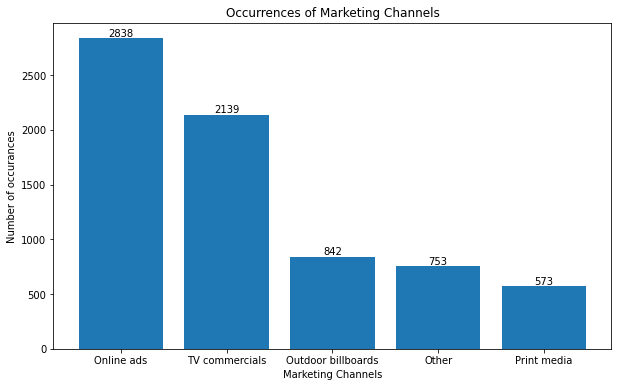

In [45]:
channel_counts = marketing_channel['Marketing_channels'].value_counts()

plt.figure(figsize=(10, 6))  
plt.bar(channel_counts.index, channel_counts.values)

for i, count in enumerate(channel_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Marketing Channels')
plt.ylabel('Number of occurances')

plt.title('Occurrences of Marketing Channels')
plt.show()

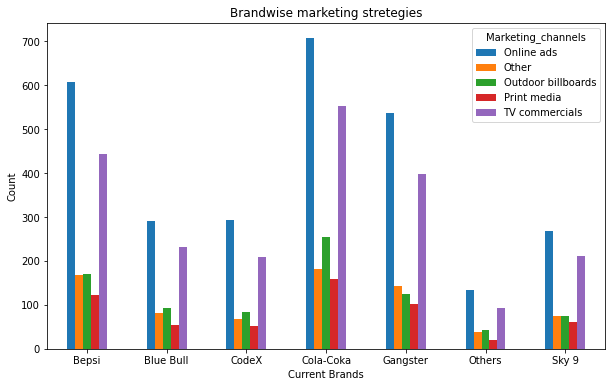

In [46]:
Brand_marketing = marketing_channel.groupby(['Current_brands', 'Marketing_channels']).size().unstack()

fig, ax = plt.subplots(figsize=(10,6))
Brand_marketing.plot(kind='bar', rot=0, ax=ax)

plt.title('Brandwise marketing stretegies')
plt.xlabel('Current Brands')
plt.ylabel('Count')

plt.show()

In [47]:
Brand_marketing.to_csv('Brand_marketing.csv')

## Brand Penetration

##### a. What do people think about our brand? (overall rating)
##### b. Which cities do we need to focus more on?

In [48]:
survey.columns
# Taste_experience, Improvements_desired, Ingredients_expected, Health_concerns, Purchase_location

brand_perception = survey[['Respondent_ID','Taste_experience','Improvements_desired', 'Health_concerns','Purchase_location' ]]

brand_perception

,Respondent_ID,Taste_experience,Improvements_desired,Health_concerns,Purchase_location
0,120031,5,Reduced sugar content,No,Supermarkets
1,120032,5,More natural ingredients,Yes,Supermarkets
2,120033,2,More natural ingredients,No,Supermarkets
4,120035,5,More natural ingredients,Yes,Online retailers
5,120036,5,Wider range of flavors,Yes,Gyms and fitness centers
...,...,...,...,...,...
9994,130025,4,Wider range of flavors,Yes,Supermarkets
9995,130026,4,Other,No,Supermarkets
9997,130028,2,Other,Yes,Other
9998,130029,4,Other,Yes,Supermarkets


In [49]:
brand_perception.to_csv('Respondent_ID.csv')

In [50]:
# brand_perception.info()

In [51]:
cities

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2
5,CT116,Hyderabad,Tier 1
6,CT117,Ahmedabad,Tier 2
7,CT118,Pune,Tier 2
8,CT119,Jaipur,Tier 2
9,CT120,Lucknow,Tier 2


In [52]:
# respondents = pd.merge(respondents, )
new_respondent

brand_perception = pd.merge(brand_perception, new_respondent, on='Respondent_ID', how='left')
brand_perception

,Respondent_ID,Taste_experience,Improvements_desired,Health_concerns,Purchase_location,City_ID,City,Tier,Name,Age,Gender
0,120031,5,Reduced sugar content,No,Supermarkets,CT117,Ahmedabad,Tier 2,Aniruddh Issac,15-18,Female
1,120032,5,More natural ingredients,Yes,Supermarkets,CT118,Pune,Tier 2,Trisha Rout,19-30,Male
2,120033,2,More natural ingredients,No,Supermarkets,CT116,Hyderabad,Tier 1,Yuvraj Virk,15-18,Male
3,120035,5,More natural ingredients,Yes,Online retailers,CT120,Lucknow,Tier 2,Mohanlal Joshi,19-30,Female
4,120036,5,Wider range of flavors,Yes,Gyms and fitness centers,CT118,Pune,Tier 2,Zeeshan Ratta,19-30,Female
...,...,...,...,...,...,...,...,...,...,...,...
7140,130025,4,Wider range of flavors,Yes,Supermarkets,CT112,Mumbai,Tier 1,Drishya Kale,19-30,Male
7141,130026,4,Other,No,Supermarkets,CT112,Mumbai,Tier 1,Arnav Kale,31-45,Male
7142,130028,2,Other,Yes,Other,CT114,Chennai,Tier 1,Vardaniya Chauhan,31-45,Male
7143,130029,4,Other,Yes,Supermarkets,CT113,Bangalore,Tier 1,Jayan Goyal,19-30,Male


In [53]:
brand_perception.to_csv('brand_perception.csv')

In [54]:
# taste experience of codex to be visualize here




### Purchase Behaviour

In [55]:

# Respondent_ID, Limited_edition_packaging, Price_range, Purchase_location, Typical_consumption_situations
purchase_beahviour = survey[['Respondent_ID', 'Limited_edition_packaging', 'Price_range', 'Purchase_location', 'Typical_consumption_situations']]
purchase_beahviour

,Respondent_ID,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,120031,Yes,50-99,Supermarkets,Studying/working late
1,120032,No,50-99,Supermarkets,Sports/exercise
2,120033,Not Sure,100-150,Supermarkets,Studying/working late
4,120035,Yes,100-150,Online retailers,Studying/working late
5,120036,Yes,Above 150,Gyms and fitness centers,Social outings/parties
...,...,...,...,...,...
9994,130025,No,Above 150,Supermarkets,Other
9995,130026,Yes,100-150,Supermarkets,Studying/working late
9997,130028,No,100-150,Other,Sports/exercise
9998,130029,Not Sure,50-99,Supermarkets,Studying/working late


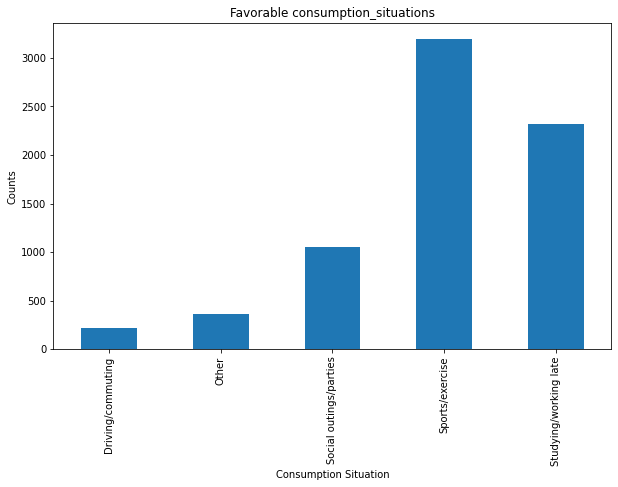

In [56]:
consumption_situations_counts = purchase_beahviour.groupby(['Typical_consumption_situations']).size()
fig,ax = plt.subplots(figsize=(10,6))

consumption_situations_counts.plot(kind='bar', ax=ax)

plt.xlabel('Consumption Situation')
plt.ylabel('Counts')
plt.title('Favorable consumption_situations')

plt.show()

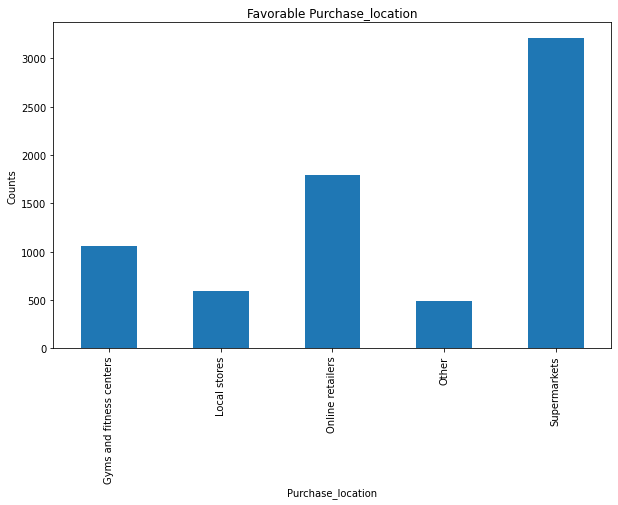

In [57]:
# survey.columns

purchase_location_counts = purchase_beahviour.groupby(['Purchase_location']).size()
fig,ax = plt.subplots(figsize=(10,6))

purchase_location_counts.plot(kind='bar', ax=ax)

plt.xlabel('Purchase_location')
plt.ylabel('Counts')
plt.title('Favorable Purchase_location')

plt.show()

In [58]:
# survey.columns
purchase_beahviour.to_csv('purchase_beahviour.csv')


In [59]:
survey.columns

Index(['Response_ID', 'Respondent_ID', 'Consume_frequency', 'Consume_time',
       'Consume_reason', 'Heard_before', 'Brand_perception',
       'General_perception', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [60]:
brand_data = survey[['Respondent_ID', 'Brand_perception', 'Current_brands']]
brand = pd.merge(brand_perception, brand_data, on='Respondent_ID')
brand


,Respondent_ID,Taste_experience,Improvements_desired,Health_concerns,Purchase_location,City_ID,City,Tier,Name,Age,Gender,Brand_perception,Current_brands
0,120031,5,Reduced sugar content,No,Supermarkets,CT117,Ahmedabad,Tier 2,Aniruddh Issac,15-18,Female,Neutral,Blue Bull
1,120032,5,More natural ingredients,Yes,Supermarkets,CT118,Pune,Tier 2,Trisha Rout,19-30,Male,Neutral,Bepsi
2,120033,2,More natural ingredients,No,Supermarkets,CT116,Hyderabad,Tier 1,Yuvraj Virk,15-18,Male,Neutral,Bepsi
3,120035,5,More natural ingredients,Yes,Online retailers,CT120,Lucknow,Tier 2,Mohanlal Joshi,19-30,Female,Neutral,Sky 9
4,120036,5,Wider range of flavors,Yes,Gyms and fitness centers,CT118,Pune,Tier 2,Zeeshan Ratta,19-30,Female,Negative,Cola-Coka
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140,130025,4,Wider range of flavors,Yes,Supermarkets,CT112,Mumbai,Tier 1,Drishya Kale,19-30,Male,Neutral,Sky 9
7141,130026,4,Other,No,Supermarkets,CT112,Mumbai,Tier 1,Arnav Kale,31-45,Male,Neutral,Cola-Coka
7142,130028,2,Other,Yes,Other,CT114,Chennai,Tier 1,Vardaniya Chauhan,31-45,Male,Positive,Blue Bull
7143,130029,4,Other,Yes,Supermarkets,CT113,Bangalore,Tier 1,Jayan Goyal,19-30,Male,Positive,Blue Bull


In [61]:
brand.to_csv('brand.csv')

In [62]:
# Lets compare the existing good brand Coca-Cola with codx

cola_coca = brand[brand['Current_brands'] == 'Cola-Coka'][['Respondent_ID', 'Taste_experience', 'Improvements_desired', 'Health_concerns', 'Purchase_location', 'City_ID', 'City', 'Tier', 'Name', 'Age', 'Gender', 'Brand_perception']]

codex = brand[brand['Current_brands'] == 'CodeX'][['Respondent_ID', 'Taste_experience', 'Improvements_desired', 'Health_concerns', 'Purchase_location', 'City_ID', 'City', 'Tier', 'Name', 'Age', 'Gender', 'Brand_perception']]

In [63]:
# count all people having the rating >3 annd convert into the percentage with compare to total people for that Brand drinkers

In [64]:
good_taste_count_cola_coca = len(cola_coca[cola_coca['Taste_experience'] > 3]['Respondent_ID'].unique())
total_count_cola_coca = len(cola_coca['Respondent_ID'].unique())
percentage_good_taste_cola_coca = (good_taste_count_cola_coca / total_count_cola_coca) * 100


good_taste_count_codex = len(codex[codex['Taste_experience'] > 3]['Respondent_ID'].unique())
total_count_codex = len(codex['Respondent_ID'].unique())

percentage_good_taste_codex = (good_taste_count_codex / total_count_codex) * 100

print("Number of people saying Cola_coca Taste is good: ", good_taste_count_cola_coca)
print("percentage of people saying Cola_coca Taste is good: ", percentage_good_taste_cola_coca)

print("Number of people saying CodeX Taste is good: ", good_taste_count_codex)
print("percentage of people saying CodeX Taste is good: ", percentage_good_taste_codex)

# Conclusion: Out of total people drinking the respective drink the percentage of taste rating is same. 

# So there is no need to improve the test experience. Just the marketing is important. But before confirming
# that lets check the impact of other parameters as well. 



Number of people saying Cola_coca Taste is good:  851
percentage of people saying Cola_coca Taste is good:  45.92552617377226
Number of people saying CodeX Taste is good:  327
percentage of people saying CodeX Taste is good:  46.317280453257794


In [65]:
codex['Brand_perception']


# Analysis of Brand perception for product development is analyzed in the power Bi and it clearly states that 
# There is no any effect of Brand perception on the product development



9        Neutral
21       Neutral
22       Neutral
23       Neutral
26       Neutral
          ...   
7088    Positive
7091    Positive
7096     Neutral
7126    Negative
7133     Neutral
Name: Brand_perception, Length: 706, dtype: object

### Product development

In [66]:
# All the brands with improvement desired

improvement_data = survey[['Respondent_ID', 'Current_brands', 'Improvements_desired']]

improvement_data.head(15)

improvement_data.to_csv('improvement_data.csv')

<ipython-input-67-b31fa09c5634>:32: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=5)


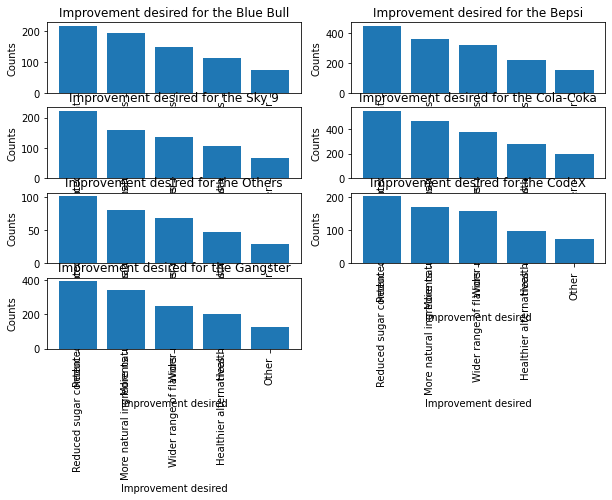

In [67]:
brands_names = improvement_data['Current_brands'].unique()

# brands_names = improvement_data['Current_brands']
## Rows and Columns


n_row = (len(brands_names) + 1) // 2
n_cols = 2

fig, axs = plt.subplots(n_row, n_cols, figsize= (10,6))

axs  = axs.flatten()

for i,brandd in enumerate(brands_names):
    brandd_data = improvement_data[improvement_data['Current_brands'] == brandd]
    # improvements_counts = brandd_data['Improvements_desired'].unique()
    improvements_counts = brandd_data['Improvements_desired'].value_counts()


    axs[i].bar(improvements_counts.index, improvements_counts.values)
    
    axs[i].set_title(f'Improvement desired for the {brandd}')
    axs[i].set_xlabel("Improvement desired")
    axs[i].set_ylabel("Counts")
    axs[i].tick_params(axis='x', rotation=90,  labelsize=10)
# Remove any empty subplots
if len(brands_names) < n_row * n_cols:
    for j in range(len(brands_names), n_row * n_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.tight_layout(pad=5)
# Display the subplots
plt.show()


In [68]:
respondents = pd.merge(respondents, cities, on='City_ID')
respondents



,Respondent_ID,Name,Age,Gender,City_ID,City,Tier
0,120031,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,120055,Umang Sarkar,31-45,Non-binary,CT117,Ahmedabad,Tier 2
2,120057,Kanav Thaman,19-30,Male,CT117,Ahmedabad,Tier 2
3,120078,Suhana Ramakrishnan,19-30,Female,CT117,Ahmedabad,Tier 2
4,120098,Saira Sridhar,19-30,Male,CT117,Ahmedabad,Tier 2
...,...,...,...,...,...,...,...
9995,129864,Ahana Cherian,19-30,Male,CT111,Delhi,Tier 1
9996,129903,Saanvi Bose,31-45,Female,CT111,Delhi,Tier 1
9997,129944,Rhea Mani,31-45,Male,CT111,Delhi,Tier 1
9998,129956,Rhea D’Alia,31-45,Female,CT111,Delhi,Tier 1


In [69]:
respondents.to_csv('respondents.csv')

In [70]:
age_groups

Index(['15-18', '19-30', '31-45', '46-65', '65+'], dtype='object', name='Age')

In [71]:
codeX_data = survey[survey['Current_brands'] == 'CodeX']
codeX_data

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
16,103017,120047,Rarely,Before exercise,To boost performance,Yes,Neutral,Effective,No,4,...,Wider range of flavors,Sugar,No,Yes,Print media,Innovative bottle design,Not Sure,50-99,Supermarkets,Studying/working late
32,103033,120063,Daily,Before exercise,Increased energy and focus,No,Neutral,Healthy,No,3,...,Wider range of flavors,Guarana,No,Not Sure,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Sports/exercise
34,103035,120065,2-3 times a week,For mental alertness,To enhance sports performance,No,Neutral,Effective,No,2,...,More natural ingredients,Vitamins,Yes,No,Online ads,Compact and portable cans,Not Sure,50-99,Supermarkets,Social outings/parties
35,103036,120066,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,2,...,Wider range of flavors,Caffeine,Yes,Not Sure,Other,Innovative bottle design,No,100-150,Supermarkets,Sports/exercise
39,103040,120070,Rarely,For mental alertness,Increased energy and focus,No,Neutral,Not sure,No,5,...,Reduced sugar content,Caffeine,Yes,Yes,Outdoor billboards,Compact and portable cans,Not Sure,100-150,Gyms and fitness centers,Sports/exercise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,112921,129951,2-3 times a month,To stay awake during work/study,Increased energy and focus,Yes,Positive,Healthy,No,1,...,Wider range of flavors,Vitamins,No,Yes,Online ads,Eco-friendly design,No,100-150,Local stores,Sports/exercise
9923,112924,129954,Rarely,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,2,...,More natural ingredients,Guarana,No,No,TV commercials,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
9929,112930,129960,Once a week,Before exercise,Increased energy and focus,Yes,Neutral,Healthy,No,5,...,More natural ingredients,Guarana,No,Not Sure,Outdoor billboards,Innovative bottle design,Yes,50-99,Online retailers,Sports/exercise
9970,112971,130001,Once a week,For mental alertness,To combat fatigue,No,Negative,Healthy,No,4,...,More natural ingredients,Vitamins,Yes,Yes,Online ads,Compact and portable cans,Yes,50-99,Local stores,Sports/exercise


In [72]:
codeX_data.to_csv('codeX.csv')

In [73]:
# Brand Panetration


brand_rating = survey[['Respondent_ID', 'Taste_experience', 'Current_brands']]

# survey.columns

# new_respondent

# cities
brand_rating

,Respondent_ID,Taste_experience,Current_brands
0,120031,5,Blue Bull
1,120032,5,Bepsi
2,120033,2,Bepsi
4,120035,5,Sky 9
5,120036,5,Cola-Coka
...,...,...,...
9994,130025,4,Sky 9
9995,130026,4,Cola-Coka
9997,130028,2,Blue Bull
9998,130029,4,Blue Bull


In [74]:
merged_rating = pd.merge(brand_rating, new_respondent, how='left', on='Respondent_ID')
merged_rating

,Respondent_ID,Taste_experience,Current_brands,City_ID,City,Tier,Name,Age,Gender
0,120031,5,Blue Bull,CT117,Ahmedabad,Tier 2,Aniruddh Issac,15-18,Female
1,120032,5,Bepsi,CT118,Pune,Tier 2,Trisha Rout,19-30,Male
2,120033,2,Bepsi,CT116,Hyderabad,Tier 1,Yuvraj Virk,15-18,Male
3,120035,5,Sky 9,CT120,Lucknow,Tier 2,Mohanlal Joshi,19-30,Female
4,120036,5,Cola-Coka,CT118,Pune,Tier 2,Zeeshan Ratta,19-30,Female
...,...,...,...,...,...,...,...,...,...
7140,130025,4,Sky 9,CT112,Mumbai,Tier 1,Drishya Kale,19-30,Male
7141,130026,4,Cola-Coka,CT112,Mumbai,Tier 1,Arnav Kale,31-45,Male
7142,130028,2,Blue Bull,CT114,Chennai,Tier 1,Vardaniya Chauhan,31-45,Male
7143,130029,4,Blue Bull,CT113,Bangalore,Tier 1,Jayan Goyal,19-30,Male


In [75]:
from tabulate import tabulate

In [76]:
average_by_city = merged_rating.groupby('City')['Taste_experience'].mean().reset_index()

# Average Taste_experience for individual Current_brands
average_by_brand = merged_rating.groupby('Current_brands')['Taste_experience'].mean().reset_index()

# Print the results in tabular format
print("Average Taste_experience for respective cities:")
print(tabulate(average_by_city, headers='keys', tablefmt='psql'))

print("\nAverage Taste_experience for individual Current_brands:")
print(tabulate(average_by_brand, headers='keys', tablefmt='psql'))

Average Taste_experience for respective cities:
+----+-----------+--------------------+
|    | City      |   Taste_experience |
|----+-----------+--------------------|
|  0 | Ahmedabad |            3.34254 |
|  1 | Bangalore |            3.30505 |
|  2 | Chennai   |            3.2282  |
|  3 | Delhi     |            3.2549  |
|  4 | Hyderabad |            3.33643 |
|  5 | Jaipur    |            3.20724 |
|  6 | Kolkata   |            3.16077 |
|  7 | Lucknow   |            3.48227 |
|  8 | Mumbai    |            3.27266 |
|  9 | Pune      |            3.31038 |
+----+-----------+--------------------+

Average Taste_experience for individual Current_brands:
+----+------------------+--------------------+
|    | Current_brands   |   Taste_experience |
|----+------------------+--------------------|
|  0 | Bepsi            |            3.25546 |
|  1 | Blue Bull        |            3.32713 |
|  2 | CodeX            |            3.31303 |
|  3 | Cola-Coka        |            3.32866 |
|  4 |

In [77]:
survey.to_csv('cleaned_survey_data.csv')

In [78]:
# survey
# cities
# respondents
city_brand_penetration = pd.merge(survey, respondents, how='left', on='Respondent_ID')
city_brand_penetration


,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,Yes,100-150,Online retailers,Studying/working late,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2
4,103006,120036,Rarely,For mental alertness,To combat fatigue,Yes,Negative,Not sure,No,5,...,Yes,Above 150,Gyms and fitness centers,Social outings/parties,Zeeshan Ratta,19-30,Female,CT118,Pune,Tier 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140,112995,130025,2-3 times a week,Throughout the day,Increased energy and focus,Yes,Neutral,Not sure,No,4,...,No,Above 150,Supermarkets,Other,Drishya Kale,19-30,Male,CT112,Mumbai,Tier 1
7141,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,...,Yes,100-150,Supermarkets,Studying/working late,Arnav Kale,31-45,Male,CT112,Mumbai,Tier 1
7142,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,...,No,100-150,Other,Sports/exercise,Vardaniya Chauhan,31-45,Male,CT114,Chennai,Tier 1
7143,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,...,Not Sure,50-99,Supermarkets,Studying/working late,Jayan Goyal,19-30,Male,CT113,Bangalore,Tier 1


In [79]:
city_brand_penetration_never_tried = city_brand_penetration[city_brand_penetration['Tried_before'] == 'No']
city_brand_penetration_never_tried

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
4,103006,120036,Rarely,For mental alertness,To combat fatigue,Yes,Negative,Not sure,No,5,...,Yes,Above 150,Gyms and fitness centers,Social outings/parties,Zeeshan Ratta,19-30,Female,CT118,Pune,Tier 2
5,103007,120037,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,Positive,Not sure,No,4,...,Yes,100-150,Other,Sports/exercise,Oorja Anne,19-30,Male,CT112,Mumbai,Tier 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140,112995,130025,2-3 times a week,Throughout the day,Increased energy and focus,Yes,Neutral,Not sure,No,4,...,No,Above 150,Supermarkets,Other,Drishya Kale,19-30,Male,CT112,Mumbai,Tier 1
7141,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,...,Yes,100-150,Supermarkets,Studying/working late,Arnav Kale,31-45,Male,CT112,Mumbai,Tier 1
7142,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,...,No,100-150,Other,Sports/exercise,Vardaniya Chauhan,31-45,Male,CT114,Chennai,Tier 1
7143,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,...,Not Sure,50-99,Supermarkets,Studying/working late,Jayan Goyal,19-30,Male,CT113,Bangalore,Tier 1


In [80]:
city_brand_penetration_never_tried.to_csv('City_wise_never_tried.csv')

In [81]:

# # Step 1: Merge the dataframes based on the city column
# merged_df = pd.merge(df1, df2, on='city', how='left')

# # Step 2: Calculate the count of respondents from DataFrame 1 for each city
# df1_count = merged_df['city'].value_counts().reset_index()
# df1_count.columns = ['city', 'df1_count']

# # Step 3: Calculate the count of respondents from DataFrame 2 for each city
# df2_count = df2['city'].value_counts().reset_index()
# df2_count.columns = ['city', 'df2_count']

# # Step 4: Calculate the percentage of respondents from DataFrame 1 that fall in DataFrame 2 for each city
# result = pd.merge(df1_count, df2_count, on='city', how='left')
# result['percentage'] = (result['df2_count'] / result['df1_count']) * 100

# # Print the result
# print(result)

df1_count = city_brand_penetration['City'].value_counts().reset_index()
df2_count = city_brand_penetration_never_tried['City'].value_counts().reset_index()

result = pd.merge(df1_count, df2_count, on='index', how='left')
# result['percentage'] = (result['df2_count'] / result['df1_count']) * 100

result




,index,City_x,City_y
0,Bangalore,1662,844
1,Mumbai,1456,1363
2,Hyderabad,1076,562
3,Pune,886,866
4,Chennai,539,270
5,Delhi,408,383
6,Ahmedabad,362,289
7,Kolkata,311,164
8,Jaipur,304,261
9,Lucknow,141,117


In [82]:
result['percentage'] = (result['City_y'] / result['City_x']) * 100

In [83]:
result = result.sort_values('percentage', ascending=False)

In [84]:
result

,index,City_x,City_y,percentage
3,Pune,886,866,97.742664
5,Delhi,408,383,93.872549
1,Mumbai,1456,1363,93.612637
8,Jaipur,304,261,85.855263
9,Lucknow,141,117,82.978723
6,Ahmedabad,362,289,79.834254
7,Kolkata,311,164,52.733119
2,Hyderabad,1076,562,52.230483
0,Bangalore,1662,844,50.782190
4,Chennai,539,270,50.092764


In [85]:
new_column_names = {'index': 'City', 'City_x': 'Count', 'City_y': 'Count_Never_Tried'}
result = result.rename(columns=new_column_names)

result

,City,Count,Count_Never_Tried,percentage
3,Pune,886,866,97.742664
5,Delhi,408,383,93.872549
1,Mumbai,1456,1363,93.612637
8,Jaipur,304,261,85.855263
9,Lucknow,141,117,82.978723
6,Ahmedabad,362,289,79.834254
7,Kolkata,311,164,52.733119
2,Hyderabad,1076,562,52.230483
0,Bangalore,1662,844,50.782190
4,Chennai,539,270,50.092764


In [86]:
# result.to_csv('never_tried_cities.csv')
survey['Reasons_for_choosing_brands']

0                  Availability
1                  Availability
2                  Availability
4                         Other
5                  Availability
                 ...           
9994    Taste/flavor preference
9995           Brand reputation
9997               Availability
9998    Taste/flavor preference
9999           Brand reputation
Name: Reasons_for_choosing_brands, Length: 7145, dtype: object

In [87]:
# # import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming your dataframe is named df

# # Calculate the correlation matrix
# selected_columns = ['Consume_frequency', 'Consume_time', 'Price_range', 'Packaging_preference', 'Current_brands']
# corr_matrix = survey[selected_columns].corr()

# # Create a heatmap of the correlation matrix
# plt.figure(figsize=(10, 8))  # Set the figure size
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# # Customize the plot
# plt.title("Correlation Matrix")
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)

# # Show the plot
# plt.show()

In [ ]:
# survey,city_brand_penetration

